# Searching & Sorting
- Not frequent in ML however:
  - Examplary to demo: 
    - Time complexity
    - Space complexity
    - Tyipcal time/space tradeoff
  - Helpful for ML pipelines:
    - Data Capture
    - Preprocessing
    - Training
    - Deployment

# 4.1 Binary Search

In [ ]:
b = np.array([np.random.randint(0, 151) for integer in range(9)])
b   # unordered list

array([100,  75, 116, 114,  70,  19,  33,  88,  93])


Under normal circumstances, the only way to search for a value (e.g., 100) is:
- to search element by element. 
- = iterate through every single elmeent. 

In the worse-case, this has O($n$) time complexity (e.g., if we were to search b for 100 from its end).

In [ ]:
# Quick sort
b.sort()
b

array([ 19,  33,  70,  75,  88,  93, 100, 114, 116])

...we can use the **binary search** algorithm, which has O(log $n$) time complexity: 

* Start at the midpoint (`b` is nine elements long, so midpoint is 5th: `88`).
* Since `100` is larger than `88`, we need only search the latter half of `b`...
* So we find the midpoint between the 5th element and the 9th, which is the 7th, and which happens to be `100`. 
* Done! And in only two steps instead of seven (if we were to search elementwise from first onward).
* If we were searching for `93`, then our next search would be halfway between 5th and 7th elements, which is 6th element and voilà!
* With our nine-element array, worst case is four steps (for `19` or `116`, the numbers at the two extremes) to find any value (or determine value *isn't* in array).

(Note: this search algorithm is called *binary* because at each step we cut the list into half and search *either* upward or downward.)

Doubling $n$ results in only one extra step in worst case:
> Don't get confused with the length of the list. The number for the length of a list is one, and the count of search operations is another.
>
> Let's say there is a list of 100 elements. Will you have to iterate through every single one of them? If that's the case, the time complexity will be linear, $O(100)$. However, we are going binary here:
>
> - Chop the list of 100 up into half, now your list is 50-element long (1 operation performed). 
> - Chop it up again: a list of 25 elements, 2 operations done.
> - Again: a list of 13 elements and 3 operations. 
>
> So you see, every binarisation (halving of the list) equals one operation. Which can be expressed using log base 2 as below...:


* One step with array of length 1($= 2^0$)
* Two steps with length 2($= 2^1$) up to length 3
* Three steps with $n = 4 (= 2^2$) up to $n = 7$
* Four steps with $n = 8 (= 2^3$) up to $n = 15$
* Five steps with $n = 16 (= 2^4$) up to $n = 31$

Hence O(log $n$) where, as is typical in CS, we use $\text{log}_2$ (because of binary bits and frequently doubling/halving quantities). E.g.: 

In [ ]:
# list of 4 elements
np.log2(4) + 1          

# the reason for +1 here is because 
# the binary search requires at least 1 operation 
# even for a list of a single element. 

3.0

In [ ]:
# list of 8 elements
np.log2(8) + 1

4.0

In [ ]:
# list of 16 elements
np.log2(16) + 1

5.0

### Binary Search Time Complexity

In [ ]:
binary = np.arange(2, 101, 2)
binary

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

Text(0.5, 1.05, 'For doubling elements, the time complexity\ngrows only exponentially slowly.')

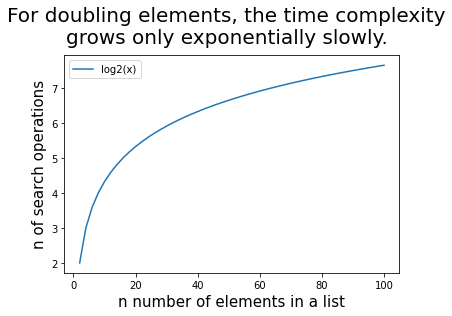

In [ ]:
fig, ax = plt.subplots()
ax.plot(binary, np.log2(binary) + 1, label="log2(x)")
ax.set_xlabel("n number of elements in a list", fontsize=15)
ax.set_ylabel("n of search operations", fontsize=15)
ax.legend()
fig.suptitle("For doubling elements, the time complexity\ngrows only exponentially slowly.", fontsize=20, y=1.05)
# In time complexity computation, however, we compute the most dominant term only. 

## Binary-searching through list - Manipulate index

Below list uses the index numbers and returns index of the searched value.

In [ ]:
# Be attentive to what the variables actually represent. 
# low, high, midpoint are all index numbers 
# which allow us to move through the list elements.

def binary_search(array, value):
    low = 0               # index of first element
    high = len(array) - 1 # index of last element

    while low <= high:    # first index value does not surpass the last index value
        midpoint = (low + high) // 2  # rounds down to nearest integer after division.
        if value < array[midpoint]:   # if the value is smaller than the midpoint value of the array,
            high = midpoint - 1       # set that midpoint index to the highest.
        elif value > array[midpoint]:
            low = midpoint + 1
        else: 
            return midpoint
    return -1

In [ ]:
binary_search(b, 114)

7

In [ ]:
binary_search(b, 235)   # returns -1 for an inexistent value

-1

In [ ]:
binary_search(binary, 68)

33

In [ ]:
def recursive_binary_search(array, value, low, high):
    if low <= high:
        midpoint = (low + high) // 2

        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)  # recursive call: half the size the previous list
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [ ]:
recursive_binary_search(b, 114, 0, len(b)-1)

7

In [ ]:
recursive_binary_search(b, 235, 0, len(b)-1)

-1

In [ ]:
recursive_binary_search(binary, 68, 0, len(binary)-1)

33

References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb